**Topic**: Challenge Set 10  
**Subject**: Decision Tree   
**Date**: 02/18/2018  
**Name**: Christine Liu

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
import graphviz 
from sklearn.datasets import load_iris

### Challenge 1
For the house representatives data set, fit and evaluate a decision tree classifier. Examine the rules your tree uses.

In [2]:
#read in url into pandas
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

df = pd.read_csv(url, names = ['Class Name','handicapped-infants','water-project-cost-sharing',
                               'adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
                              'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras',
                              'mx-missile','immigration','synfuels-corporation-cutback','education-spending',
                              'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'])

In [3]:
#Replace 'y's with 1s, 'n's with 0s
for i in df.columns:
    df.loc[df[str(i)] == 'n', str(i)] = 0
    df.loc[df[str(i)] == 'y', str(i)] = 1

In [4]:
# replace ?s with Nones
for i in df.columns:
    df.loc[df[str(i)] == '?', str(i)] = None

In [5]:
# fill Nans with 1/0
for i in df.columns[1:]:
    #0 is more
    if df[str(i)][df[str(i)] == 1].count() < df[str(i)][df[str(i)] == 0].count():
        df[str(i)].fillna(0,inplace = True)
    else:
        df[str(i)].fillna(1,inplace = True)

In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,:1]

In [7]:
SKF = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)
for train_index, test_index in SKF.split(X,y):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

In [8]:
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)

In [9]:
dtc.predict(X_test)

array(['republican', 'democrat', 'democrat', 'democrat', 'republican',
       'democrat', 'democrat', 'republican', 'republican', 'democrat',
       'republican', 'republican', 'republican', 'republican',
       'republican', 'republican', 'democrat', 'democrat', 'republican',
       'democrat', 'democrat', 'democrat', 'republican', 'democrat',
       'republican', 'democrat', 'democrat', 'democrat', 'republican',
       'democrat', 'democrat', 'democrat', 'democrat', 'republican',
       'republican', 'democrat', 'democrat', 'republican', 'republican',
       'democrat', 'democrat', 'republican'], dtype=object)

In [10]:
dtc.predict_proba(X_test);

In [11]:
dtc.score(X_train,y_train), dtc.score(X_test,y_test)

(0.99491094147582693, 0.88095238095238093)

In [12]:
party = tree.export_graphviz(dtc, out_file=None) 
graph = graphviz.Source(party) 

In [13]:
type(graph)

graphviz.files.Source

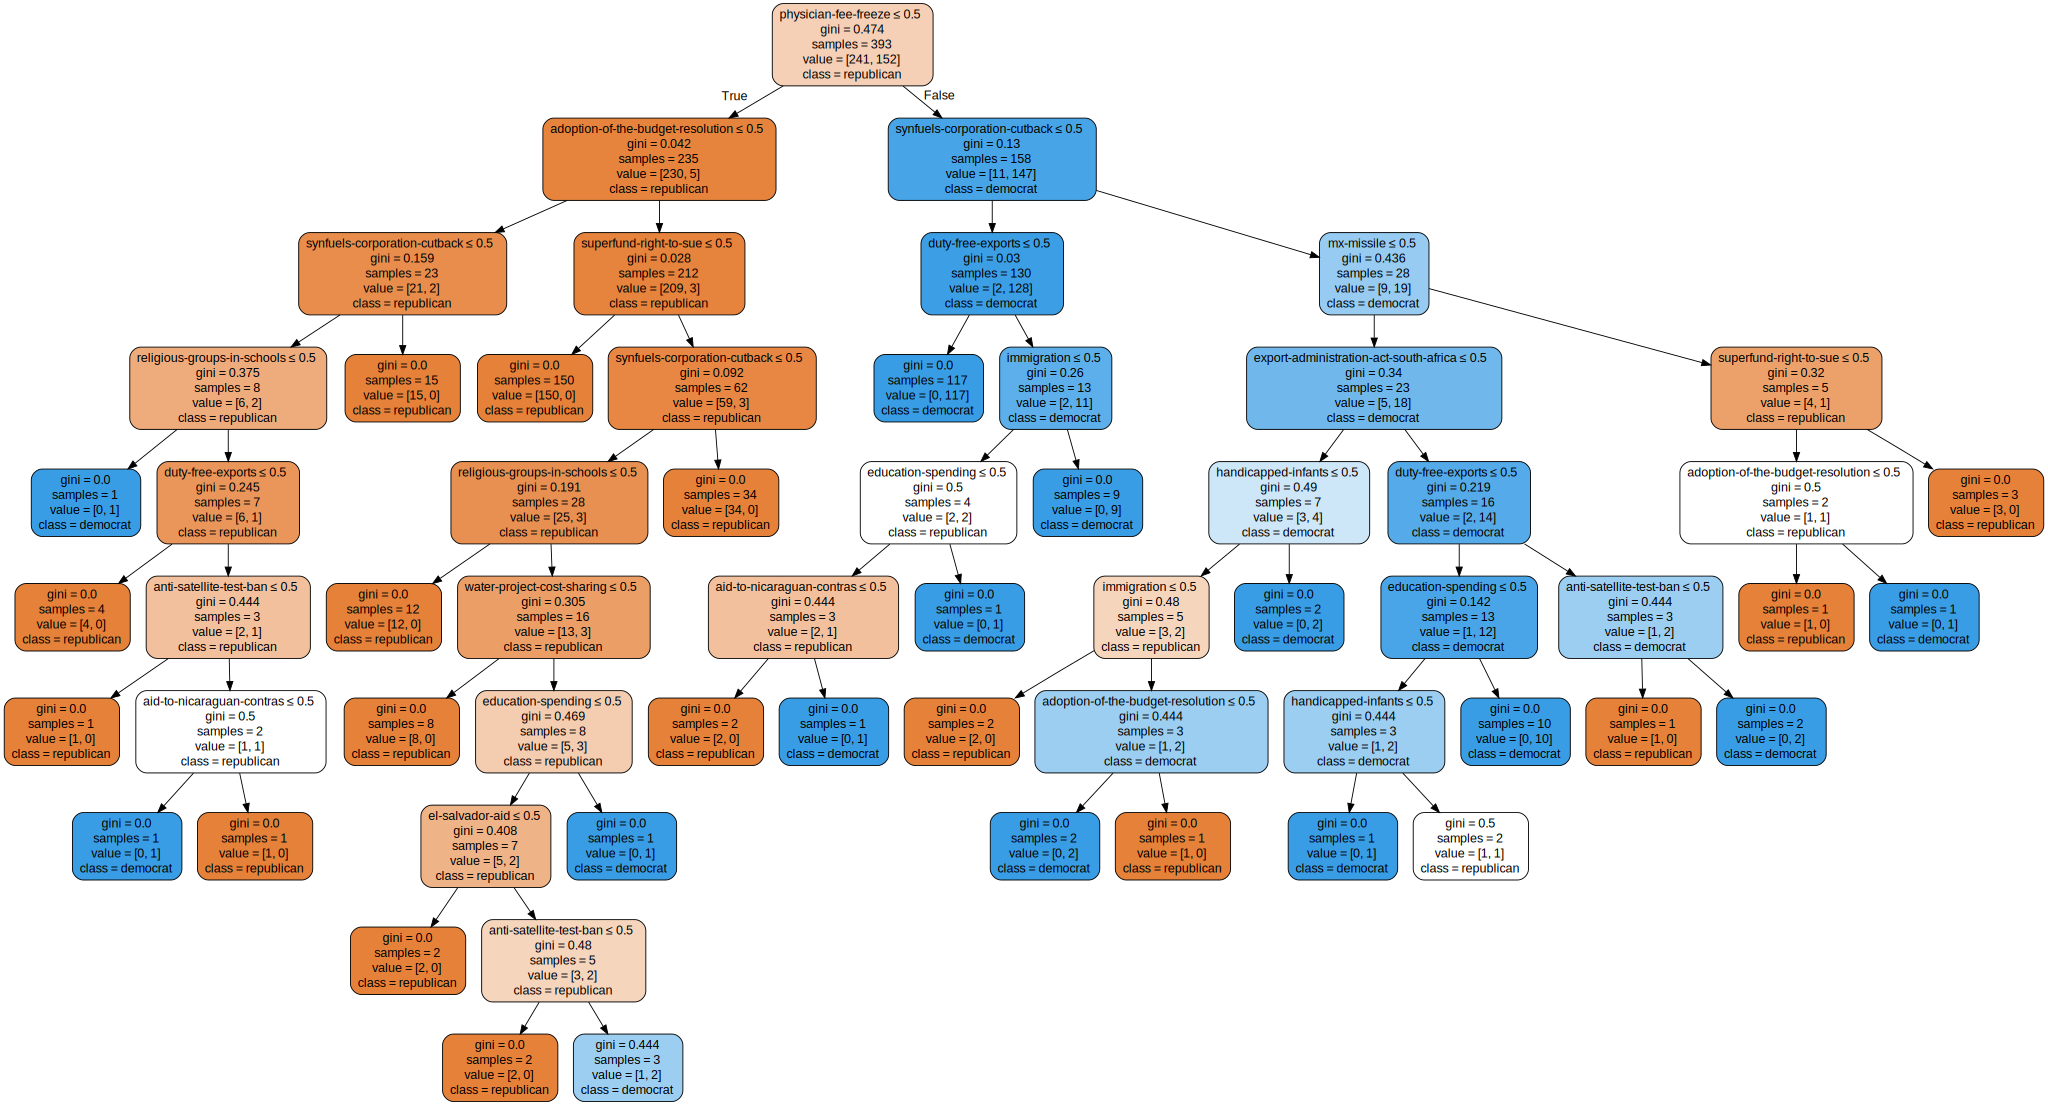

In [14]:
party = tree.export_graphviz(dtc, out_file=None, 
                             feature_names=X.columns,  
                             class_names=y['Class Name'].unique(),  
                             filled=True, rounded=True,  
                             special_characters=True)  
graph = graphviz.Source(party)  
graph

#### Challenge 2
Fit and evaluate a decision tree classifier for your movie dataset. Examine the rules your tree uses.

In [15]:
movies = pd.read_csv('challenges_data/2013_movies.csv')

In [16]:
movies.dropna(inplace = True)

In [17]:
movies = movies.drop(['ReleaseDate','Title','Director'], axis = 1,errors = 'ignore');

In [18]:
movies.head()

,Budget,DomesticTotalGross,Rating,Runtime
0,130000000.0,424668047,PG-13,146
1,200000000.0,409013994,PG-13,129
2,150000000.0,400738009,PG,108
3,76000000.0,368061265,PG,98
4,225000000.0,291045518,PG-13,143


In [19]:
XM = movies.drop(['Rating'], axis = 1)
yM = movies.Rating.to_frame()

In [20]:
SKF = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)
for train_index, test_index in SKF.split(XM,yM):
    XM_train = XM.iloc[train_index]
    XM_test = XM.iloc[test_index]
    yM_train = yM.iloc[train_index]
    yM_test = yM.iloc[test_index]

In [21]:
dtc2 = tree.DecisionTreeClassifier()
dtc2 = dtc2.fit(XM_train,yM_train)

In [22]:
dtc2.score(XM_train,yM_train), dtc2.score(XM_test,yM_test)

(1.0, 0.25)

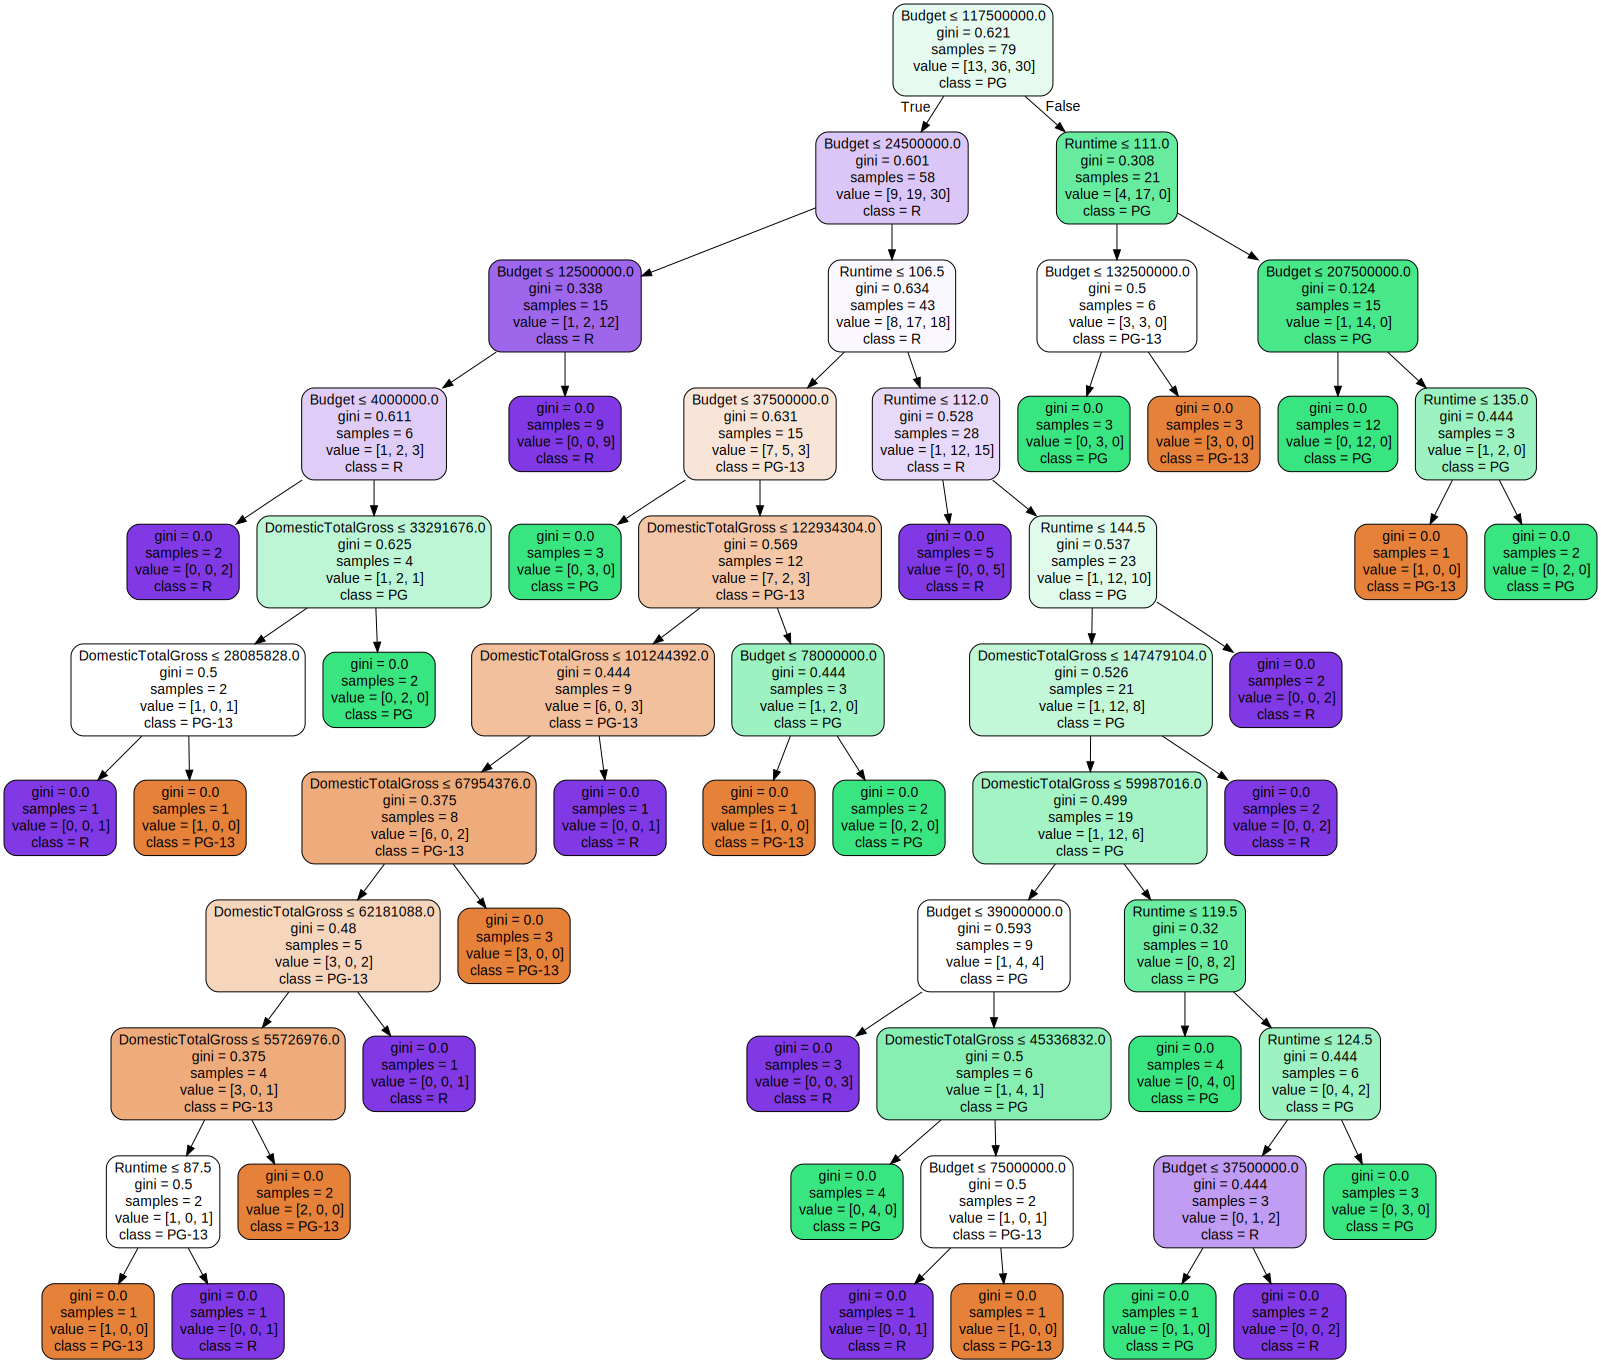

In [23]:
movie_graphic = tree.export_graphviz(dtc2, out_file=None, 
                             feature_names=XM.columns,  
                             class_names=yM['Rating'].unique(),  
                             filled=True, rounded=True,  
                             special_characters=True)  
movie_tree = graphviz.Source(movie_graphic)  
movie_tree